In [1]:
import cv2
import os
import json
import matplotlib.pyplot as plt
from google.colab import drive

In [2]:
def get_frame_at_time(video_path, time_sec, save_path=None):
    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        print("Error: Could not open video.")
        return None

    fps = cap.get(cv2.CAP_PROP_FPS)
    frame_number = int(fps * time_sec)

    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)
    ret, frame = cap.read()

    if not ret:
        print("Error: Cannot read frame.")
        return None

    if save_path:
        cv2.imwrite(save_path, frame)
        print(f"Saved frame at {time_sec} seconds to {save_path}")

    cap.release()
    return frame

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [8]:
ls

 1.3/                                           PaperMetadata@
 aihub_annotations.json                         Pothole_hunter_기말발표.pdf
 ASL_0_2.pth                                    pt_data/
 ASL_0_4.pth                                    rdd2022_batch_0.pkl
 ASL_0_6.pth                                    rdd2022_batch_1.pkl
'Colab Notebooks'/                              rdd2022_batch_2.pkl
 data/                                          rdd2022_batch_3.pkl
 F_resize_224.pkl                               resize_224.pkl
 HoViT_44_DropPath_0_25.pth                     V_resize_224.pkl
'Hybrid and Optimized Vision Transformer.pdf'


In [10]:
print(os.path.exists('/content/drive/MyDrive/pt_data/real_road_data/'))
print(os.path.exists('/content/drive/MyDrive/pt_data/real_road_data/real_data.json'))

True
True


In [9]:
json_path = '/content/drive/MyDrive/pt_data/real_road_data/real_data.json'
with open(json_path, 'r') as f:
    sec_data = json.load(f)

In [11]:
print(sec_data)

[{'filename': 'OWD_20250527_121723_F.mp4', 'pt_cr_time': [{'time': 22, 'label': 'crack'}]}, {'filename': 'OWD_20250527_122323_F.mp4', 'pt_cr_time': [{'time': 22, 'label': 'pothole'}]}, {'filename': 'OWD_20250527_122423_F.mp4', 'pt_cr_time': [{'time': 33, 'label': 'pothole'}]}, {'filename': 'OWD_20250527_122623_F.mp4', 'pt_cr_time': [{'time': 43, 'label': 'pothole'}]}, {'filename': 'OWD_20250527_122823_F.mp4', 'pt_cr_time': [{'time': 46, 'label': 'crack'}]}, {'filename': 'OWD_20250527_122923_F.mp4', 'pt_cr_time': [{'time': 9, 'label': 'pothole'}, {'time': 20, 'label': 'crack'}]}, {'filename': 'OWD_20250527_123123_F.mp4', 'pt_cr_time': [{'time': 22, 'label': 'pothole'}]}, {'filename': 'OWD_20250527_123323_F.mp4', 'pt_cr_time': [{'time': 21, 'label': 'pothole'}]}, {'filename': 'OWD_20250527_123523_F.mp4', 'pt_cr_time': [{'time': 10, 'label': 'pothole'}, {'time': 17, 'label': 'pothole'}]}, {'filename': 'OWD_20250527_123823_F.mp4', 'pt_cr_time': [{'time': 41, 'label': 'crack'}, {'time': 46,

In [25]:
folder_path = '/content/drive/MyDrive/pt_data/real_road_data/'
pt_cr_list = []
for filename in os.listdir(folder_path):
    if filename.endswith('.mp4'):
        video_path = os.path.join(folder_path, filename)
        print(f"Processing video: {video_path}")

        get_data = {}
        #print(filename)
        flag = False
        for data in sec_data:
            if data['filename'] == filename:
                flag = True
                data_dic = data
                break

        if flag:
          for time_label in data_dic['pt_cr_time']:
              sec = time_label['time']
              label = time_label['label']
              frame = get_frame_at_time(video_path, sec, save_path=os.path.join(folder_path, f"notnormal/{filename}_frame_{sec}.png"))

              if frame is not None:
                  get_data = {
                        "video": filename.replace('.mp4', ''),
                        "time": sec,
                        "label": label,
                        "frame": frame
                    }
                  pt_cr_list.append(get_data)

Processing video: /content/drive/MyDrive/pt_data/real_road_data/OWD_20250527_131823_F.mp4
Processing video: /content/drive/MyDrive/pt_data/real_road_data/OWD_20250527_131723_F.mp4
Processing video: /content/drive/MyDrive/pt_data/real_road_data/OWD_20250527_131623_F.mp4
Processing video: /content/drive/MyDrive/pt_data/real_road_data/OWD_20250527_131423_F.mp4
Processing video: /content/drive/MyDrive/pt_data/real_road_data/OWD_20250527_131323_F.mp4
Processing video: /content/drive/MyDrive/pt_data/real_road_data/OWD_20250527_131523_F.mp4
Processing video: /content/drive/MyDrive/pt_data/real_road_data/OWD_20250527_131223_F.mp4
Processing video: /content/drive/MyDrive/pt_data/real_road_data/OWD_20250527_131023_F.mp4
Saved frame at 37 seconds to /content/drive/MyDrive/pt_data/real_road_data/notnormal/OWD_20250527_131023_F.mp4_frame_37.png
Processing video: /content/drive/MyDrive/pt_data/real_road_data/OWD_20250527_131123_F.mp4
Processing video: /content/drive/MyDrive/pt_data/real_road_data/OW

In [26]:
print(pt_cr_list)

[{'video': 'OWD_20250527_131023_F', 'time': 37, 'label': 'crack', 'frame': array([[[255, 201, 180],
        [255, 201, 180],
        [225, 209, 180],
        ...,
        [ 42,  71,  46],
        [ 43,  72,  40],
        [ 55,  84,  52]],

       [[255, 201, 180],
        [255, 201, 180],
        [225, 209, 180],
        ...,
        [ 34,  63,  38],
        [ 38,  67,  35],
        [ 48,  77,  45]],

       [[255, 201, 180],
        [255, 201, 180],
        [225, 209, 180],
        ...,
        [  4,  30,  13],
        [ 34,  58,  41],
        [ 37,  61,  44]],

       ...,

       [[ 36,  24,   4],
        [ 87,  75,  55],
        [128, 114,  99],
        ...,
        [ 36,  32,  28],
        [ 37,  33,  29],
        [ 37,  33,  29]],

       [[ 47,  35,  15],
        [ 94,  82,  62],
        [124, 113,  97],
        ...,
        [ 34,  30,  26],
        [ 34,  30,  26],
        [ 34,  30,  26]],

       [[ 61,  49,  29],
        [ 97,  85,  65],
        [119, 108,  92],
        ...,

In [27]:
len(pt_cr_list)

36

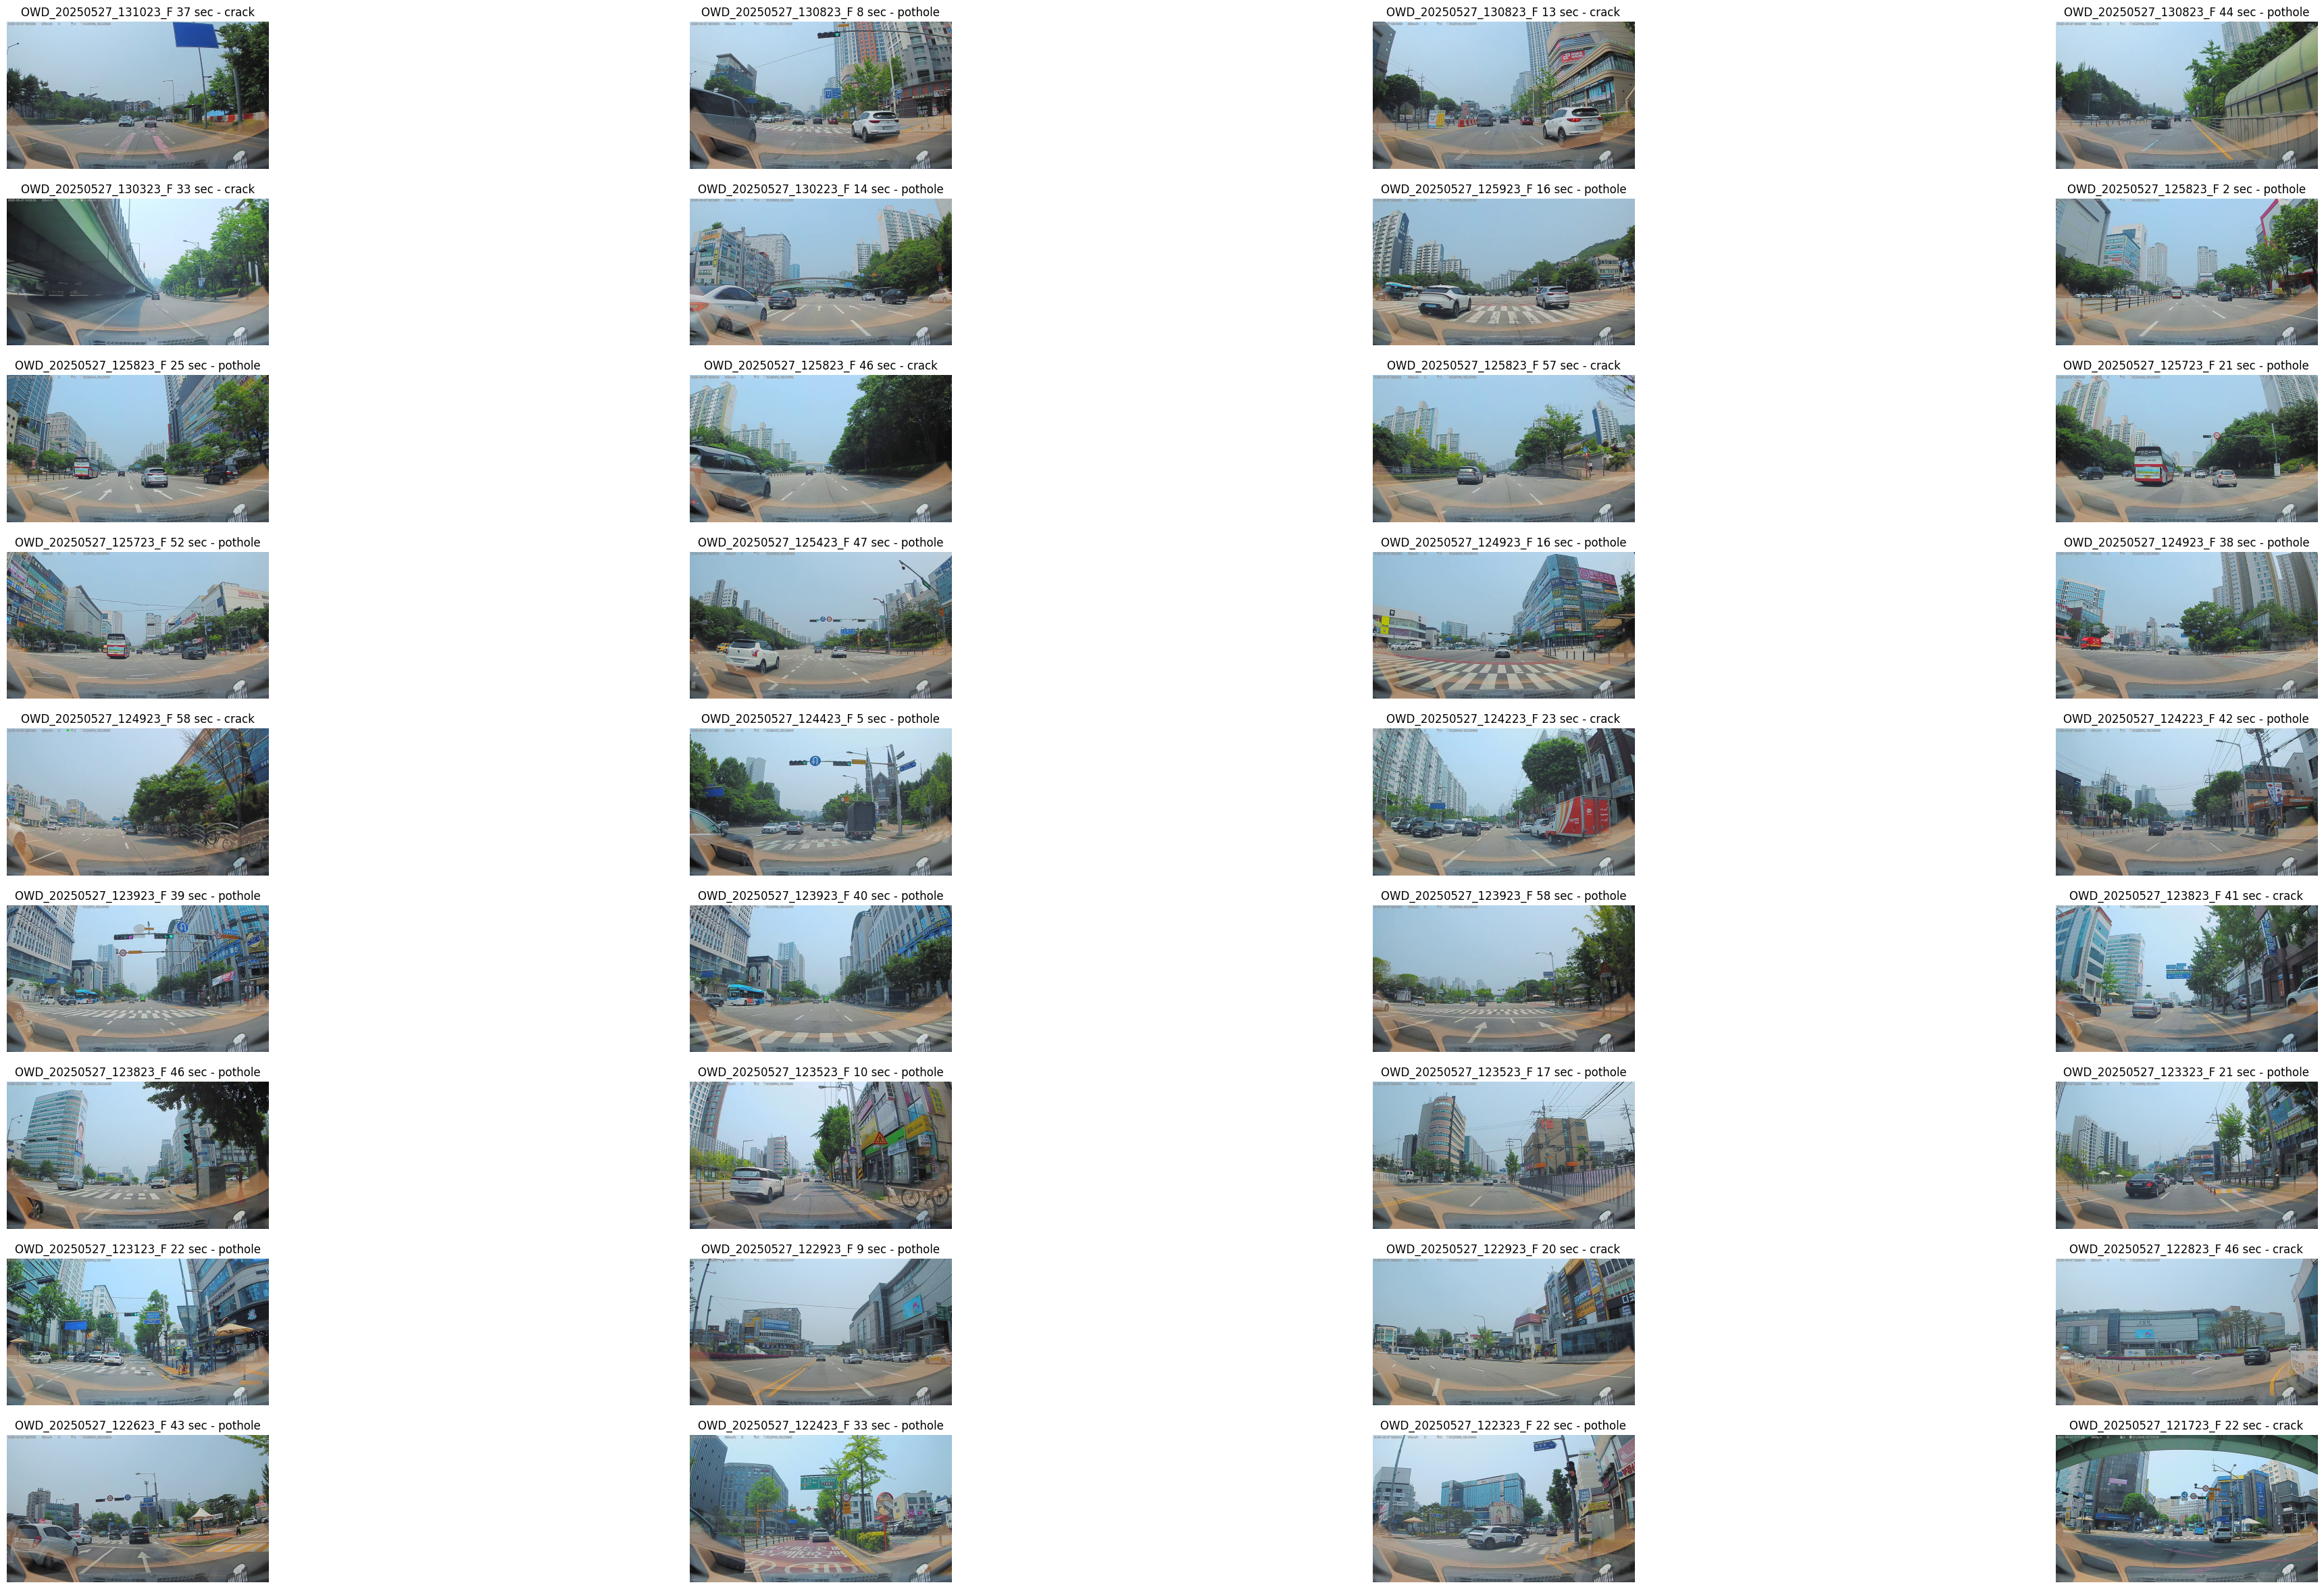

In [28]:
fig, axes = plt.subplots(nrows=len(pt_cr_list) // 4, ncols=4, figsize=(50, 30))

for i, data in enumerate(pt_cr_list):
    ax = axes[i // 4, i % 4]
    ax.imshow(cv2.cvtColor(data["frame"], cv2.COLOR_BGR2RGB))
    ax.set_title(f"{data['video']} {data['time']} sec - {data['label']}")
    ax.axis('off')

In [29]:
json_save_path = os.path.join(folder_path, 'pt_cr_list.json')

# Create a new list without the 'frame' key for JSON serialization
pt_cr_list_serializable = []
for item in pt_cr_list:
    serializable_item = item.copy() # Create a copy to avoid modifying the original list
    if 'frame' in serializable_item:
        del serializable_item['frame']
    pt_cr_list_serializable.append(serializable_item)

with open(json_save_path, 'w') as f:
    json.dump(pt_cr_list_serializable, f, indent=4)